In [1]:
# Vaccination data: https://www.kaggle.com/gpreda/covid-world-vaccination-progress
# New covid cases in Lithuania: https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/ba35de03e111430f88a86f7d1f351de6_0/data
# New covid cases worldwide: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

In [29]:
import pandas as pd
import numpy as np

## Prepare confirmed cases data

In [30]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
dfCases = pd.read_csv(url, index_col=0)
dfCases = dfCases.drop(columns=['Lat', 'Long'])
dfCases = dfCases.reset_index(drop = True)
dfCases

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,57160,57242,57364,57492,57534,57612,57721,57793,57898,58037
1,Albania,0,0,0,0,0,0,0,0,0,...,128393,128518,128752,128959,129128,129307,129456,129594,129694,129842
2,Algeria,0,0,0,0,0,0,0,0,0,...,118516,118645,118799,118975,119142,119323,119486,119642,119805,119992
3,Andorra,0,0,0,0,0,0,0,0,0,...,12545,12581,12614,12641,12641,12712,12771,12805,12805,12874
4,Angola,0,0,0,0,0,0,0,0,0,...,23457,23549,23697,23841,23951,24122,24300,24389,24518,24661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Vietnam,0,2,2,2,2,2,2,2,2,...,2693,2705,2714,2733,2758,2772,2781,2785,2791,2800
270,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,268132,270856,272767,274690,276407,278135,279753,280741,282270,284280
271,Yemen,0,0,0,0,0,0,0,0,0,...,5357,5446,5507,5582,5657,5715,5770,5812,5858,5918
272,Zambia,0,0,0,0,0,0,0,0,0,...,90029,90064,90218,90389,90532,90750,90844,90918,90942,91042


In [75]:
def prepareCasesData(country, countryPop):
    data = dfCases[dfCases['Country/Region'] == country]
    data = data.melt(id_vars=["Country/Region"], 
        var_name="Date", 
        value_name="Confirmed Cases")
    data['New Cases'] = data['Confirmed Cases'].diff() # Calculating new cases by substracting nth row value from nth-1 row value
    data['New Cases per pop.'] = data['New Cases'] / countryPop
    data['MA7'] = data['New Cases'].rolling(7).mean() # 7 day Moving Average for new cases 
    data['MA7'].fillna(0, inplace = True)
    data['New Cases'].fillna(0, inplace = True)
    data['Date'] = pd.to_datetime(data.Date)
    
    return data

In [76]:
casesLT = prepareCasesData('Lithuania', 2722289)

In [77]:
casesLT

,Country/Region,Date,Confirmed Cases,New Cases,New Cases per pop.,MA7
0,Lithuania,2020-01-22,0,0.0,NaN,0.000000
1,Lithuania,2020-01-23,0,0.0,0.000000,0.000000
2,Lithuania,2020-01-24,0,0.0,0.000000,0.000000
3,Lithuania,2020-01-25,0,0.0,0.000000,0.000000
4,Lithuania,2020-01-26,0,0.0,0.000000,0.000000
...,...,...,...,...,...,...
450,Lithuania,2021-04-16,231601,1139.0,0.001139,1041.714286
451,Lithuania,2021-04-17,232829,1228.0,0.001228,1074.428571
452,Lithuania,2021-04-18,233631,802.0,0.000802,1065.428571
453,Lithuania,2021-04-19,234232,601.0,0.000601,1064.142857


## Prepare vaccines data

In [34]:
file = 'country_vaccinations.csv'
dfVaccines = pd.read_csv(file)
dfVaccines

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12509,Zimbabwe,ZWE,2021-04-12,234579.0,205275.0,29304.0,11087.0,12724.0,1.58,1.38,0.20,856.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...
12510,Zimbabwe,ZWE,2021-04-13,248355.0,218516.0,29839.0,13776.0,12246.0,1.67,1.47,0.20,824.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...
12511,Zimbabwe,ZWE,2021-04-14,262128.0,231632.0,30496.0,13773.0,11816.0,1.76,1.56,0.21,795.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...
12512,Zimbabwe,ZWE,2021-04-15,285881.0,252932.0,32949.0,23753.0,13172.0,1.92,1.70,0.22,886.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...


In [35]:
def prepareVaccinesData(country, countryPop):
    
    data = dfVaccines[dfVaccines['country'] == country]
    data = data[['country', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']]
    data['ppl_vac_percent'] = data['people_vaccinated'].apply(lambda x: (x / countryPop) * 100) # Share of people who received at least one dose of vaccine
    data['Date'] = pd.to_datetime(data.date)
    data.drop(columns = ['date'], inplace = True)
    
    return data

In [36]:
vaccLT = prepareVaccinesData('Lithuania', 2722289)
vaccLT

,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,ppl_vac_percent,Date
6676,Lithuania,2420.0,2420.0,NaN,0.088896,2020-12-27
6677,Lithuania,5207.0,5207.0,NaN,0.191273,2020-12-28
6678,Lithuania,8194.0,8194.0,NaN,0.300997,2020-12-29
6679,Lithuania,9726.0,9726.0,NaN,0.357273,2020-12-30
6680,Lithuania,9751.0,9751.0,NaN,0.358191,2020-12-31
...,...,...,...,...,...,...
6784,Lithuania,729457.0,529676.0,199781.0,19.457008,2021-04-14
6785,Lithuania,751976.0,547173.0,204803.0,20.099740,2021-04-15
6786,Lithuania,771584.0,562166.0,209418.0,20.650489,2021-04-16
6787,Lithuania,773239.0,563640.0,209599.0,20.704635,2021-04-17


## Merge vaccines and new cases data

In [78]:
def mergeData(country, countryPop):
    cases = prepareCasesData(country, countryPop)
    vacc = prepareVaccinesData(country, countryPop)
    
    data = cases.merge(vacc, how = 'inner', on = 'Date')
    
    data.fillna(method='ffill', inplace=True)    
    return data

In [79]:
LT = mergeData('Lithuania', 2722289)
df = LT[['Date', 'MA7', 'ppl_vac_percent']]

#### In order to have smooth animated plot, I create extra 10 rows for every row. In this way, plot doesn't jump from one point to another and gives a smoother look

In [80]:
rows = 10
df1 = pd.concat([df.iloc[0:1], pd.DataFrame([[np.nan]*df.shape[1]]*rows, columns=df.columns), df.iloc[1:2]], ignore_index=True)
df1['MA7'] = df1['MA7'].interpolate()
df1['ppl_vac_percent'] = df1['ppl_vac_percent'].interpolate()
df1['Date'] = df1['Date'].ffill()

for i in range(1, len(df)):
    df1 = pd.concat([df1, pd.DataFrame([[np.nan]*df.shape[1]]*rows, columns=df.columns), df.iloc[i+1:i+2]], ignore_index=True)
    df1['MA7'] = df1['MA7'].interpolate()
    df1['ppl_vac_percent'] = df1['ppl_vac_percent'].interpolate()
    df1['Date'] = df1['Date'].ffill()

In [81]:
#Another way:
rows = 10
(df.assign(enum=df.groupby('Date').cumcount())
   .set_index(['enum', 'Date'])
   .unstack('Date')
   .reindex(range(rows + 1))
   .stack('Date', dropna=False)
   .sort_index(level='Date')
   .reset_index('Date')
   .interpolate()
   .reset_index(drop=True)
).iloc[:-rows]

,Date,MA7,ppl_vac_percent
0,2020-12-27,2669.857143,0.088896
1,2020-12-27,2665.428571,0.098203
2,2020-12-27,2661.000000,0.107510
3,2020-12-27,2656.571429,0.116817
4,2020-12-27,2652.142857,0.126124
...,...,...,...
1228,2021-04-17,1068.701299,20.706599
1229,2021-04-17,1067.883117,20.706879
1230,2021-04-17,1067.064935,20.707160
1231,2021-04-17,1066.246753,20.707440


# Plotting

In [83]:
%matplotlib notebook

<IPython.core.display.Javascript object>


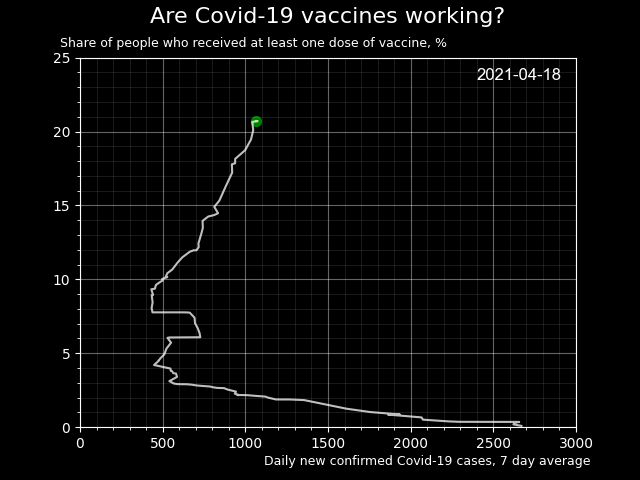

MovieWriter ffmpeg unavailable; using Pillow instead.


In [18]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = df1['MA7']
y = df1['ppl_vac_percent']
date = df1['Date']

fig, ax = plt.subplots()
plt.style.use('dark_background')
plt.rcParams["font.family"] = "arial"



line, = ax.plot(x, y, color='white', alpha = 0.75)
sctr  = ax.scatter([],[], s=50, color='green')
time_text = ax.text(0.8, 0.94, '', transform=ax.transAxes, fontsize = 'large')



def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    ax.set_xlim([0, 3000]) # fix the x axis
    ax.set_ylim([0, 25]) # fix the y axis
    sctr.set_offsets((x[num],y[num]))
    time_text.set_text(date[num].strftime('%Y-%m-%d'))
    return line, sctr

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=50, blit=True)

# Grid and ticks
x_major_ticks = np.arange(0, 3001, 500)
x_minor_ticks = np.arange(0, 3001, 100)

y_major_ticks = np.arange(0, 26, 5)
y_minor_ticks = np.arange(0, 26, 1)

ax.set_xticks(x_major_ticks)
ax.set_xticks(x_minor_ticks, minor=True)
ax.set_yticks(y_major_ticks)
ax.set_yticks(y_minor_ticks, minor=True)

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.4)

# Labels
ax.set_xlabel('Daily new confirmed Covid-19 cases, 7 day average', fontsize = 9)
ax.xaxis.set_label_coords(0.7, -0.075)
ax.set_ylabel('Share of people who received at least one dose of vaccine, %', fontsize = 9, rotation = 'horizontal')
ax.yaxis.set_label_coords(0.35, 1.02)

# Title
ax.set_title('Are Covid-19 vaccines working?', y = 1.07, fontsize = 16)

# Animate
ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=50, blit=True, repeat=False)

ani.save('Final.gif')
plt.show()